# MAS DSE 200: Homework 4 - Regression, Clustering, MiniProject

#### Tasks: 

- Linear Regression on Boston Housing dataset
- Clustering on Weather dataset
- MiniProject homework problems
- Submit this Jupyter notebook to "Homework 4"

#### Due date: Sunday 12/03/2023 at 11:59 PM PST

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

scikit-learn - https://scikit-learn.org/stable/modules/classes.html

In [1]:
seed = 42

### Import libraries/functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

## Part 1 - Linear Regression - 10 points

### 1. Exploration - (1 point)

Read the data from Boston_Housing.csv file and store it in a dataframe called "housing"


**1.1 Print the number of rows in the dataframe (0.33 points)**

In [3]:
# YOUR CODE HERE
housing=pd.read_csv('Boston_Housing.csv', index_col=False)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Column names in file and their description

- CRIM — per capita crime rate by town.
- ZN — proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS — proportion of non-retail business acres per town.
- CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX — nitrogen oxides concentration (parts per 10 million).
- RM — average number of rooms per dwelling.
- AGE — proportion of owner-occupied units built prior to 1940.
- DIS — weighted mean of distances to five Boston employment centres.
- RAD — index of accessibility to radial highways.
- TAX — full-value property-tax rate per $10,000.
- PTRATIO — pupil-teacher ratio by town.
- BLACK — 1000(Bk — 0.63)² where Bk is the proportion of blacks by town.
- LSTAT — lower status of the population (percent).



- **MV** — median value of owner-occupied homes in $1000s. **This is the target variable.**

**1.2. See one row of the dataframe (0.33 points)**

In [4]:
# YOUR CODE HERE
housing.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


**1.3. Print `info` of the dataframe (0.34 points)**

In [5]:
# YOUR CODE HERE
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 2. Feature selection - 2 points


**2.1. Select the following features from the dataframe (0.5 points)**
* Select the following features from the dataframe - ['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']
* Print `info` of the resulting DataFrame to verify

In [6]:
# YOUR CODE HERE
housing[['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MV']]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**2.2. Drop rows where target variable `MV` has null values (if need) (0.5 points)**

* Print the number of remaining rows

In [7]:
# YOUR CODE HERE
mv_na=housing[['MV']].isna().any(axis=1).sum()
print('There are', mv_na, 'rows where target variable MV has null values')
mv_dropna=housing[['MV']].dropna().any(axis=1).sum()
print('the number of remaining rows:', mv_dropna)

There are 0 rows where target variable MV has null values
the number of remaining rows: 506


**2.3. Fill null values of remaining columns using mean of the column values (if need) (1 points)**


In [8]:
# YOUR CODE HERE
#housing.isna().any(axis=1).sum()
housing.fillna(housing.mean(), inplace=True)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 3. Train test split - 1 point

**3.1. Store features in variable `X` and target MV in variable `y` (0.5 points)**

In [9]:
X = housing[['CRIM' , 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT']]
y = housing[['MV']] 

**3.2. Split the dataset into train and test split (0.5 points)**
 * Train dataframe and test dataframe with a 75:25 split between them (75% for train and 25% for test)
 * Pass `random_state=seed` to train_test_split function to reproduce results
 * Print the number of rows in train and test dataframes

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed) # YOUR CODE HERE

In [11]:
print('rows in train:', X_train.shape[0], '\n', 'rows in test:', y_train.shape[0])

rows in train: 379 
 rows in test: 379


### 4. Standardize the data - 1 point


**4.1. Use `StandardScaler` to fit a scaler model (0.5 points)**
* Use the StandardScaler to standardize your data(only the features, not the target).
* **IMPORTANT** - Use only the training data for scaling 
* Standardization results in each column having zero mean and unit standard deviation

In [12]:
sc = StandardScaler() # I question about this. Not sure a regression needs a standardization.
                        

In [13]:
# YOUR CODE HERE
sc.fit_transform(X_train)
sc.fit_transform(X_test) 

array([[-0.42099129, -0.44496424, -1.08540424, ..., -1.41458158,
         0.44419754, -0.56723075],
       [-0.42475396,  1.22324119, -0.72648881, ..., -0.8318639 ,
         0.45799486, -1.34274421],
       [-0.41950497, -0.44496424,  2.51743753, ...,  0.6249303 ,
         0.39107788,  0.70371057],
       ...,
       [-0.41569758, -0.44496424, -0.6504474 , ..., -0.6570486 ,
         0.32465365, -1.02184209],
       [-0.39337713, -0.44496424, -0.57896848, ...,  0.33357146,
         0.45799486, -0.75583112],
       [-0.42877215,  3.0999723 , -1.07019596, ..., -0.6570486 ,
         0.413942  , -0.94443149]])

**4.2. Scale your training and test data (0.5 points)**

In [14]:
X_train_scaled = sc.fit_transform(X_train)# YOUR CODE HERE
X_test_scaled = sc.fit_transform(X_test) # it says IMPORTANT - Use only the training data for scaling. 
                                        # (This is a contradiction, I think this is wrong.)
                                       # Since X_train is scaled. To get Y_test_predict, X_test need to be scaled as well, right? 


### 5. Training - 2 points

**5.1. Use `LinearRegression` for training a regression model (1.0 points)**

In [15]:
lr = LinearRegression()

In [16]:
# YOUR CODE HERE
lr.fit(X_train_scaled, y_train)

LinearRegression()

**5.3. Print the mean squared error(MSE) and coefficient of determination(r2) of the training data (1.0 points)**

In [17]:
y_train_pred = lr.predict(X_train_scaled) # what's the reason here? why need to predict on the training set? I dont get this question.

In [18]:
# YOUR CODE HERE
MSE_train= mean_squared_error(y_true= y_train, y_pred= y_train_pred)
MSE_train

22.34005799215287

In [19]:
r2_train= r2_score(y_true= y_train, y_pred= y_train_pred)
r2_train

0.748087259862344

### 6. Test the model on test data - 1 point

**6.1. Print the MSE and r2 on test data. Is it very different from the result on training data? (1 point)**

In [20]:
y_test_pred = lr.predict(X_test_scaled)

In [21]:
# YOUR CODE HERE
MSE_test= mean_squared_error(y_true= y_test, y_pred= y_test_pred)
MSE_test

25.182477578236547

In [22]:
r2_test= r2_score(y_true= y_test, y_pred= y_test_pred)
r2_test

0.6403897651093928

### 7. Plot results on test data(using matplotlib) - 2 points

 * In the test data, you have the real values of the target, and you also have predictions for each row of the test data.
 * Plot a scatter plot of the real value (x axis) and the predictions (y axis) on a single plot so that you can visualize how the predictions look as compared to the ground truth (use figsize=(8,8))
 * Plot a x=y red line (45 angle line) to observe how much the real and predicted values differ among them.

In [23]:
# YOUR CODE HERE
y_test_list = y_test['MV'].tolist()
#y_test_list
y_test_pred_list = np.array(y_test_pred).tolist()
#y_test_pred_list

d = {'y_test': y_test_list, 'y_test_pred': y_test_pred_list}
df_4_plot=pd.DataFrame(data= d)
df_4_plot


,y_test,y_test_pred
0,23.6,[31.425329579095063]
1,32.4,[39.247108524254294]
2,13.6,[16.48633554904505]
3,22.8,[27.02173735170682]
4,16.1,[20.001642796338267]
...,...,...
122,8.8,[5.980838921931049]
123,19.2,[25.79643712858736]
124,25.3,[27.85694681012188]
125,20.4,[24.52359765780528]


In [24]:
# y_test_list

In [25]:
# y_test_pred_list

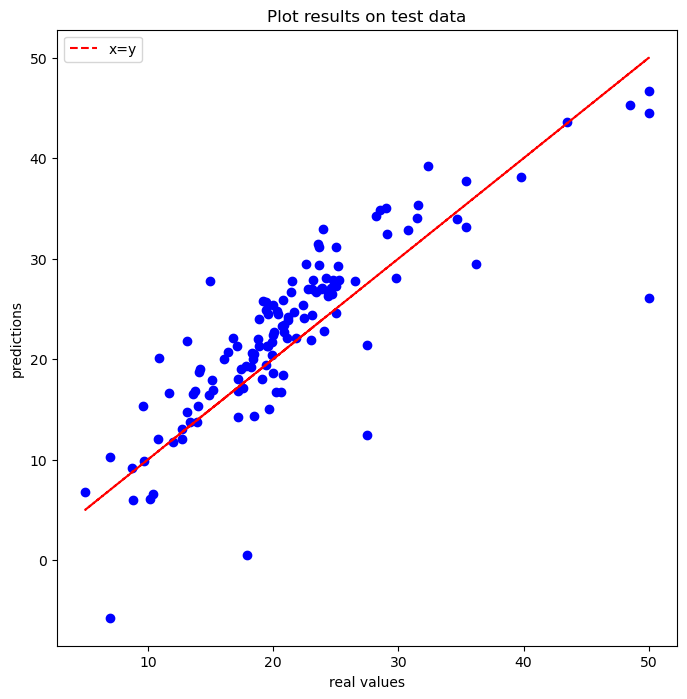

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_list, y_test_pred_list, color='blue')

# Plotting the x=y 
x=y
plt.plot(x, y, color='red', linestyle='--', label='x=y')

plt.xlabel('real values')
plt.ylabel('predictions')
plt.title('Plot results on test data')
plt.legend()


## Part 2 - Clustering - 5 points

#### 8. Load Data - 1 point
- Load the "minute_weather.csv" into the Pandas dataframe called `weather`
- Drop the two columns ["rowID", "hpwren_timestamp"] from the dataframe
- Print the `info` of the dataframe

Unlike the regression problem, all remaining columns are features here i.e. there is no `target` variable

In [27]:
weather = pd.read_csv('minute_weather.csv')
weather = weather.dropna()

In [28]:
# YOUR CODE HERE
weather= weather.drop(columns=['rowID', 'hpwren_timestamp'])
weather

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
...,...,...,...,...,...,...,...,...,...,...,...
1587252,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586823 entries, 1 to 1587256
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   air_pressure        1586823 non-null  float64
 1   air_temp            1586823 non-null  float64
 2   avg_wind_direction  1586823 non-null  float64
 3   avg_wind_speed      1586823 non-null  float64
 4   max_wind_direction  1586823 non-null  float64
 5   max_wind_speed      1586823 non-null  float64
 6   min_wind_direction  1586823 non-null  float64
 7   min_wind_speed      1586823 non-null  float64
 8   rain_accumulation   1586823 non-null  float64
 9   rain_duration       1586823 non-null  float64
 10  relative_humidity   1586823 non-null  float64
dtypes: float64(11)
memory usage: 145.3 MB


#### 9. Data Splitting - 1 points

**Split into train and test data**
* Split the dataset into train dataframe and test dataframe with a 75:25 split between them (25% of the data goes for test set)
* Pass `random_state=seed` to train_test_split function to reproduce results

In [30]:
# I question this. For clustering, do I need the test dataset? why split?

In [31]:
# YOUR CODE HERE 
X2 = weather
X2_train, X2_test = train_test_split(X2, test_size=0.25, random_state=seed)

In [32]:
#X2_train

In [33]:
#X2_test

In [34]:
print('rows in train:', X2_train.shape[0], '\n', 'rows in test:', X2_test.shape[0])

rows in train: 1190117 
 rows in test: 396706


#### 10. Standardize the data - 1 points

* Use the StandardScaler to standardize your data. Unlike the regression problem, all columns are features here i.e. there is no `target` variable
* **IMPORTANT** - Use only the training data for scaling
* Print out the mean and standard deviation along the feature columns of both the train and the test dataset after standardization. What do you observe?

In [35]:
# YOUR CODE HERE
X2_train_scaled = sc.fit_transform(X2_train)
X2_train_scaled

array([[ 4.49830847e-01,  9.14740025e-01,  2.20241911e-01, ...,
        -1.49997853e-03, -7.76815468e-03,  5.49287441e-01],
       [-2.40249660e+00, -1.34923814e-01,  2.30747390e-01, ...,
        -1.49997853e-03, -7.76815468e-03,  5.18763512e-01],
       [ 4.82616220e-01,  9.60377583e-01,  4.93384363e-01, ...,
        -1.49997853e-03, -7.76815468e-03, -3.43537468e-01],
       ...,
       [ 2.20333236e-01, -9.41187342e-01,  4.30351489e-01, ...,
        -1.49997853e-03, -7.76815468e-03, -5.57204967e-01],
       [ 1.07275293e+00,  2.91026729e-01,  4.16487695e-02, ...,
        -1.49997853e-03, -7.76815468e-03, -9.00599163e-01],
       [ 1.26946517e+00, -1.58011316e+00, -6.20196402e-01, ...,
        -1.49997853e-03, -7.76815468e-03, -9.42569564e-01]])

In [36]:
# 1. Print out the mean and standard deviation along the feature columns of X2_train_scaled
print(X2_train_scaled.mean(axis=0))
print(X2_train_scaled.std(axis=0))

[-1.81612881e-13 -1.57331235e-15 -4.46941176e-17  2.64815334e-17
  3.38101507e-17  1.07335139e-16 -8.82553594e-17  3.71010133e-16
  4.18671520e-19  2.23888513e-21 -6.90746812e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
# 2. Print out the mean and standard deviation along the feature columns of X2_test
print(X2_test.mean(axis=0))
print(X2_test.std(axis=0))

air_pressure          916.837135
air_temp               61.851667
avg_wind_direction    161.755123
avg_wind_speed          2.774651
max_wind_direction    163.128448
max_wind_speed          3.401956
min_wind_direction    166.825160
min_wind_speed          2.132103
rain_accumulation       0.004772
rain_duration           0.719684
relative_humidity      47.575211
dtype: float64
air_pressure            3.055599
air_temp               11.833793
avg_wind_direction     95.266932
avg_wind_speed          2.060476
max_wind_direction     92.371182
max_wind_speed          2.423819
min_wind_direction     97.530588
min_wind_speed          1.745235
rain_accumulation       1.629393
rain_duration         123.032646
relative_humidity      26.206629
dtype: float64


#### 11. Build a KMeans Clustering Model - 2 points
- Use the standardized training dataset to fit a K-means model with 9 clusters
    * Pass `random_state=seed` to `KMeans` for reproducing results
- Print out the cluster centers found by the model

In [38]:
# YOUR CODE HERE
cluster = KMeans(n_clusters=9, random_state=seed) 
cluster

KMeans(n_clusters=9, random_state=42)

In [39]:
y_predicted = cluster.fit_predict(X2_train_scaled)
y_predicted

C:\Users\ljw12\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 8, 1, ..., 1, 1, 0])

In [40]:
centers = cluster.cluster_centers_
centers

array([[ 2.59186155e-01,  1.77229341e-01, -1.13800213e+00,
        -4.92498022e-01, -1.02995070e+00, -5.17318955e-01,
        -1.30487697e+00, -4.33501753e-01, -1.40551114e-03,
        -5.43247193e-03, -3.19959784e-01],
       [ 8.95711279e-02,  6.80185268e-01,  7.17272978e-01,
        -6.64370519e-01,  9.27903093e-01, -6.45766292e-01,
         4.50681554e-01, -6.67716430e-01, -1.48648697e-03,
        -7.45817619e-03, -5.73094275e-01],
       [ 4.82616220e-01,  5.04002001e-01, -1.20850322e+00,
         4.08852888e+00, -1.08800738e+00,  4.12757106e+00,
        -1.34263817e+00,  3.93411057e+00,  1.08726800e+03,
         9.25183883e+02, -1.16005256e+00],
       [ 1.24193833e+00, -2.13892920e-01, -1.15109914e+00,
         1.78600672e+00, -1.05366019e+00,  1.87806806e+00,
        -1.30045056e+00,  1.59025838e+00, -1.46429890e-03,
        -6.46565105e-03, -1.10551068e+00],
       [-2.78552796e-01, -1.02659075e+00,  4.44163640e-01,
        -3.17952641e-01,  6.10691943e-01, -3.02630595e-01,
  

## Part 3 - MiniProject Homework - 5 points

#### 12. Complete Two MiniProject Homeworks (Select two from any of the mini project homework assignments provided by your classmates and embed them below) - 2.5 points each

In [2]:
# YOUR CODE HERE
# 1) Thanya_Kunghae_Mini Project - Seaborn

from IPython.display import IFrame
notebook_path = 'Thanya_Kunghae_Mini Project - Seaborn.ipynb'
display(IFrame(notebook_path, width=800, height=600))


In [3]:
# 2) Ritesh_Saxena_Mini_Project-1

from IPython.display import IFrame
notebook_path = 'Ritesh_Saxena_Mini_Project-1.ipynb'
display(IFrame(notebook_path, width=800, height=600))